In [1]:
import property_inference_interface
interface = property_inference_interface.PropertyInferenceInterface()

meta_params = {
    'size_of_test_set': 100,
    'flatten': True, 
    'model_type': 'normal',
    'adv_attack': 'i_FGSM'
}

interface.set_meta_params(meta_params)
interface.print_meta_params()

size_of_test_set     : 100
flatten              : True
model_type           : normal
adv_attack           : i_FGSM


In [2]:
interface.prepare_dataset()
interface.print_dataset_shape()

Train dataset
(50000, 784) (50000,)
Test dataset
(100, 784) (100,)


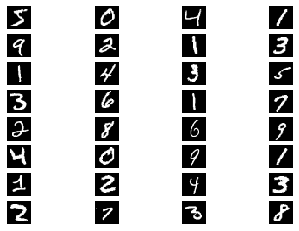

In [3]:
# Visualize the dataset
%matplotlib inline
interface.print_some_samples()

In [ ]:
interface.generate_model(num_of_epochs=5)
interface.eval_model('train')
interface.eval_model('test')

0


In [ ]:
print('Display the architectur')
interface.model

In [ ]:
interface.generate_LPs()
interface.print_LPs()
model = interface.model

In [ ]:


alphas = [.5, .4, .3, .2, 1e-1, 1e-2, 1e-3, 1e-4, 8e-5, 5e-5, 2e-5, 1e-5, 5e-6, 1e-6, 5e-7, 1e-7, 7e-8, 5e-8, 2e-8, 1e-8, 5e-9, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16]
for alpha in alphas:
    (benign_detect_ratio, adversarial_detect_ratio), (benign_LPs, adversarial_LPs) = interface.evaluate_algorithm_on_test_set(alpha, verbose=False)
    exp_info = [benign_detect_ratio, adversarial_detect_ratio]
    print(alpha, exp_info)

In [ ]:
import numpy as np

BLPs, ALPs = np.array(benign_LPs), np.array(adversarial_LPs)
print(BLPs.shape, ALPs.shape)

BLPs[BLPs=='benign'] = 1
BLPs[BLPs=='adversarial'] = 0
BLPs = BLPs.astype(np.int)
prob_BLPs = np.sum(BLPs, axis=0) / BLPs.shape[0]

ALPs[ALPs=='benign'] = 1
ALPs[ALPs=='adversarial'] = 0
ALPs = ALPs.astype(np.int)
prob_ALPs = np.sum(ALPs, axis=0) / ALPs.shape[0]

print(1 - prob_BLPs)
print(1 - prob_ALPs)

In [ ]:
def single_exp():
    interface.generate_model(num_of_epochs=5)
    interface.generate_LPs()
    (benign_detect_ratio, adversarial_detect_ratio), (benign_LPs, adversarial_LPs) = interface.evaluate_algorithm_on_test_set(alpha, verbose=False)
    exp_info = [benign_detect_ratio, adversarial_detect_ratio]
    return exp_info    

def exp(num_of_trails, file_name):
    cumulative_exp_info = []
    
    import csv 
    for i in range(num_of_trails):
        print('trail', (i+1))
        single_exp_info = single_exp()
        cumulative_exp_info.append(single_exp_info)

        with open(file_name, mode='a', newline='') as file:
            writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            writer.writerow(single_exp_info)
        file.close()

        print(single_exp_info)
        
    return cumulative_exp_info

file_name = 'test.csv'
# cumulative_exp_info = exp(40, file_name)

In [ ]:
print('all pass')